In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train123.csv')
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [3]:
df.shape

(12690, 9)

Observation: Datset has 12690 rows and 9 columns

In [4]:
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         11981 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [6]:
#Split time to T1 T2 T3 
df['T1']=df["TIME"].str.split(",").str[0]
df['T2']=df["TIME"].str.split(r"(").str[-1].str[0:-1]
df['T3']=df["TIME"].str.split(",",1).str[-1].str.split("(").str[0]

#split cuisines to c1,c2
c1=df['CUISINES'].str.split(",").str[0]
df['c1'] = c1
c2=df['CUISINES'].str.split(",").str[1]
df['c2'] = c2
c3=df['CUISINES'].str.split(",").str[2]
df['c3'] = c3

#split title as title1,title2
title1=df['TITLE'].str.split(",").str[0]
df['title1'] = title1
title2=df['TITLE'].str.split(",").str[1]
df['title2'] = title2

#drop orginal column
df=df.drop(["TITLE","CUISINES","TIME"],axis=1)

#Remove votes and - 
df['RATING']=pd.to_numeric(df['RATING'].str.replace("-",""))
df['VOTES']=pd.to_numeric(df['VOTES'].str.replace("votes",""))

df

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,T1,T2,T3,c1,c2,c3,title1,title2
0,9438,Thane,Dombivali East,3.6,49.0,1200,11am – 4pm,Mon-Sun,7:30pm – 11:30pm,Malwani,Goan,North Indian,CASUAL DINING,NaN
1,13198,Chennai,Ramapuram,4.2,30.0,1500,6pm – 11pm (Mon-Sun),Mon-Sun,6pm – 11pm,Asian,Modern Indian,Japanese,CASUAL DINING,BAR
2,10915,Chennai,Saligramam,3.8,221.0,800,11am – 3:30pm,Mon-Sun,7pm – 11pm,North Indian,Chinese,Biryani,CASUAL DINING,NaN
3,6346,Mumbai,Bandra West,4.1,24.0,800,11:30am – 1am (Mon-Sun),Mon-Sun,11:30am – 1am,Tibetan,Chinese,NaN,QUICK BITES,NaN
4,15387,Mumbai,Lower Parel,3.8,165.0,300,11am – 1am (Mon-Sun),Mon-Sun,11am – 1am,Desserts,NaN,NaN,DESSERT PARLOR,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,13228,Hyderabad,Gachibowli,3.8,546.0,500,12noon – 12midnight (Mon,"Mon, Tue, Wed, Thu, Sun)..","Tue, Wed, Thu, Sun)...",North Indian,Burger,Kebab,QUICK BITES,NaN
12686,9686,Mumbai,Bandra Kurla Complex,4.3,1214.0,1800,12noon – 1am (Mon-Fri),"Mon-Fri),11am – 5pm, 7pm – 1am..","11am – 5pm, 7pm – 1am...",Goan,Continental,NaN,CASUAL DINING,BAR
12687,11133,Navi Mumbai,Vashi,4.0,608.0,1300,12noon – 12:30AM (Mon-Sun),Mon-Sun,12noon – 12:30AM,Finger Food,Continental,Asian,LOUNGE,NaN
12688,6134,Chennai,Maduravoyal,3.5,32.0,400,6am – 10:45pm (Mon-Sun),Mon-Sun,6am – 10:45pm,North Indian,South Indian,Chinese,CASUAL DINING,NaN


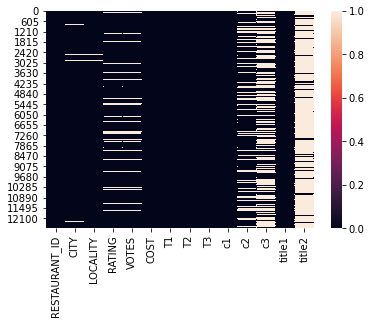

In [7]:
sns.heatmap(df.isnull())

Obseravtion: Null value are present

In [8]:
df.isnull().sum()

RESTAURANT_ID        0
CITY               112
LOCALITY            98
RATING            1204
VOTES             1204
COST                 0
T1                   0
T2                   0
T3                   0
c1                   0
c2                3062
c3                6999
title1               0
title2           11208
dtype: int64

In [9]:
#Using mean and mode method to replace null value
from sklearn.impute import SimpleImputer
imp1=SimpleImputer(strategy="most_frequent")
df['CITY']=imp1.fit_transform(df['CITY'].values.reshape(-1,1))
df['c2']=imp1.fit_transform(df['c2'].values.reshape(-1,1))
df['c3']=imp1.fit_transform(df['c3'].values.reshape(-1,1))
df['LOCALITY']=imp1.fit_transform(df['LOCALITY'].values.reshape(-1,1))


from sklearn.impute import SimpleImputer
imp1=SimpleImputer(strategy="mean")
df['VOTES']=imp1.fit_transform(df['VOTES'].values.reshape(-1,1))
df['RATING']=imp1.fit_transform(df['RATING'].values.reshape(-1,1))

In [10]:
#more number is null, column can be dropped
df=df.drop(["title2"],axis=1)
df

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,T1,T2,T3,c1,c2,c3,title1
0,9438,Thane,Dombivali East,3.6,49.0,1200,11am – 4pm,Mon-Sun,7:30pm – 11:30pm,Malwani,Goan,North Indian,CASUAL DINING
1,13198,Chennai,Ramapuram,4.2,30.0,1500,6pm – 11pm (Mon-Sun),Mon-Sun,6pm – 11pm,Asian,Modern Indian,Japanese,CASUAL DINING
2,10915,Chennai,Saligramam,3.8,221.0,800,11am – 3:30pm,Mon-Sun,7pm – 11pm,North Indian,Chinese,Biryani,CASUAL DINING
3,6346,Mumbai,Bandra West,4.1,24.0,800,11:30am – 1am (Mon-Sun),Mon-Sun,11:30am – 1am,Tibetan,Chinese,Chinese,QUICK BITES
4,15387,Mumbai,Lower Parel,3.8,165.0,300,11am – 1am (Mon-Sun),Mon-Sun,11am – 1am,Desserts,Chinese,Chinese,DESSERT PARLOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,13228,Hyderabad,Gachibowli,3.8,546.0,500,12noon – 12midnight (Mon,"Mon, Tue, Wed, Thu, Sun)..","Tue, Wed, Thu, Sun)...",North Indian,Burger,Kebab,QUICK BITES
12686,9686,Mumbai,Bandra Kurla Complex,4.3,1214.0,1800,12noon – 1am (Mon-Fri),"Mon-Fri),11am – 5pm, 7pm – 1am..","11am – 5pm, 7pm – 1am...",Goan,Continental,Chinese,CASUAL DINING
12687,11133,Navi Mumbai,Vashi,4.0,608.0,1300,12noon – 12:30AM (Mon-Sun),Mon-Sun,12noon – 12:30AM,Finger Food,Continental,Asian,LOUNGE
12688,6134,Chennai,Maduravoyal,3.5,32.0,400,6am – 10:45pm (Mon-Sun),Mon-Sun,6am – 10:45pm,North Indian,South Indian,Chinese,CASUAL DINING


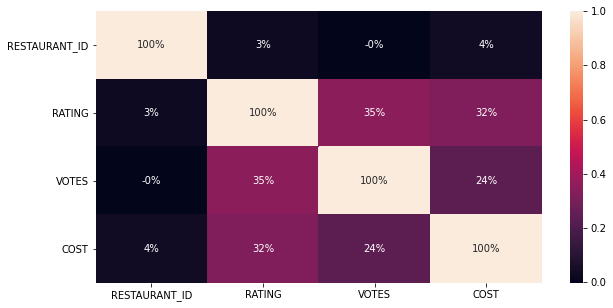

In [14]:
#Correlation
dfcor=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(dfcor,annot=True,fmt='.0%')

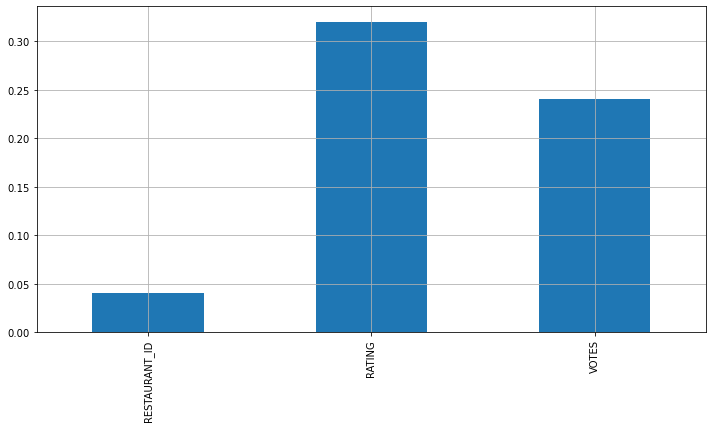

In [15]:
plt.figure(figsize=(12,6))
df.drop('COST',axis=1).corrwith(df['COST']).plot(kind='bar',grid=True)

Observation: Rating and votes are highly postively correlated 

In [29]:
#Label encoding for numeric values
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
list1=["CITY","LOCALITY","T1","T2","T3","c1","c2","c3","title1"]
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [27]:
df.describe()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,T1,T2,T3,c1,c2,c3,title1
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,7759.134121,143.081639,652.391568,3.785452,415.668901,655.252246,588.831521,435.745390,676.998976,49.272577,37.668952,29.240347,11.563357
std,4504.874150,83.661747,399.116379,0.401565,801.745630,627.003540,394.075802,68.371213,317.870049,28.482250,23.600556,19.158922,8.227629
min,0.000000,0.000000,0.000000,2.000000,4.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3863.250000,68.000000,337.000000,3.600000,64.000000,300.000000,290.000000,445.000000,472.000000,25.000000,23.000000,21.000000,4.000000
50%,7740.000000,132.000000,582.000000,3.800000,200.000000,500.000000,514.000000,445.000000,596.000000,48.000000,25.000000,21.000000,9.000000
75%,11688.750000,223.000000,1009.000000,4.000000,415.668901,800.000000,913.000000,445.000000,930.000000,72.000000,62.000000,24.000000,21.000000
max,15573.000000,358.000000,1415.000000,4.900000,41186.000000,14000.000000,1394.000000,583.000000,1271.000000,103.000000,97.000000,92.000000,22.000000


#Observation:
    cost min is 20 and max is 14000,rating min is 2 and max is 4.9,votes min is 4 and max is 41186
    Outliers are present in rating votes and cost as difference between 75% and max is higher
    

RESTAURANT_ID       AxesSubplot(0.125,0.657941;0.065678x0.222059)
CITY             AxesSubplot(0.203814,0.657941;0.065678x0.222059)
LOCALITY         AxesSubplot(0.282627,0.657941;0.065678x0.222059)
RATING           AxesSubplot(0.361441,0.657941;0.065678x0.222059)
VOTES            AxesSubplot(0.440254,0.657941;0.065678x0.222059)
COST             AxesSubplot(0.519068,0.657941;0.065678x0.222059)
T1               AxesSubplot(0.597881,0.657941;0.065678x0.222059)
T2               AxesSubplot(0.676695,0.657941;0.065678x0.222059)
T3               AxesSubplot(0.755508,0.657941;0.065678x0.222059)
c1               AxesSubplot(0.834322,0.657941;0.065678x0.222059)
c2                  AxesSubplot(0.125,0.391471;0.065678x0.222059)
c3               AxesSubplot(0.203814,0.391471;0.065678x0.222059)
title1           AxesSubplot(0.282627,0.391471;0.065678x0.222059)
dtype: object

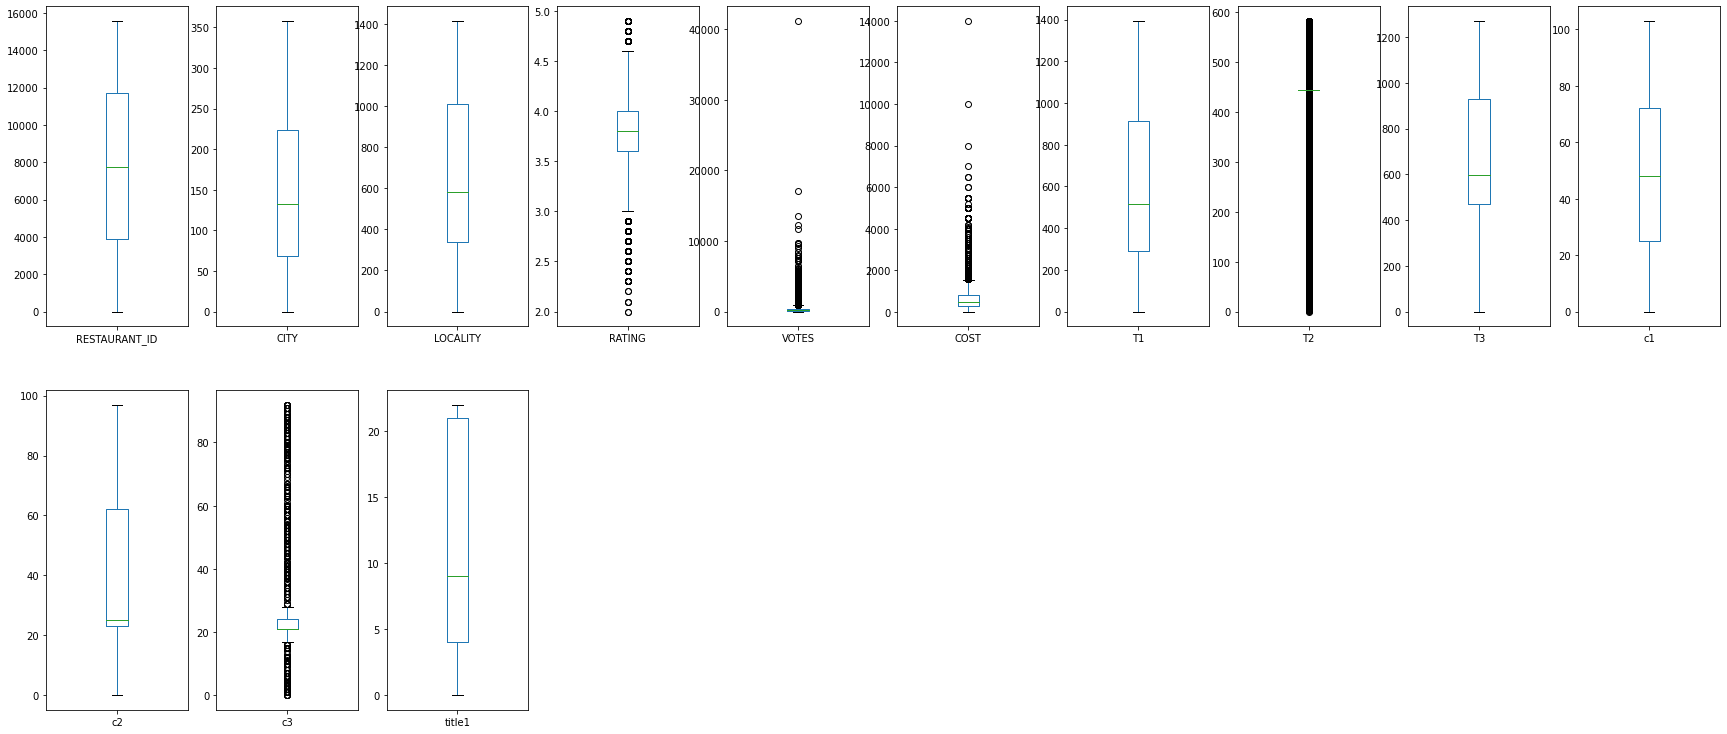

In [28]:
# Outliers are present 
df.plot(kind='box',subplots=True,layout=(3,10),figsize=(30,20))

In [24]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
data=df[(z<3).all(axis=1)]
data

(array([   77,    84,    84,    99,   113,   159,   170,   186,   196,
         206,   208,   261,   264,   293,   296,   303,   304,   308,
         337,   344,   354,   371,   379,   379,   401,   406,   422,
         431,   469,   476,   495,   502,   510,   545,   559,   563,
         580,   599,   632,   651,   672,   730,   731,   775,   796,
         811,   839,   852,   855,   870,   872,   876,   888,   913,
         924,   966,   967,   973,   973,   988,  1000,  1008,  1020,
        1034,  1038,  1047,  1095,  1124,  1132,  1133,  1136,  1147,
        1151,  1170,  1193,  1244,  1266,  1288,  1288,  1345,  1346,
        1379,  1384,  1395,  1445,  1467,  1470,  1475,  1476,  1489,
        1502,  1513,  1522,  1535,  1540,  1544,  1570,  1579,  1585,
        1594,  1617,  1632,  1657,  1681,  1681,  1685,  1695,  1737,
        1759,  1766,  1773,  1778,  1816,  1828,  1845,  1850,  1878,
        1884,  1916,  1929,  1930,  1931,  1973,  1980,  1993,  2068,
        2074,  2082

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,T1,T2,T3,c1,c2,c3,title1
0,9438,320,285,3.6,49.0,1200,343,445,206,59,32,66,4
1,13198,68,1046,4.2,30.0,1500,945,445,1010,6,60,41,4
2,10915,68,1101,3.8,221.0,800,327,445,231,72,23,12,4
3,6346,223,136,4.1,24.0,800,178,445,516,100,23,21,21
4,15387,223,620,3.8,165.0,300,316,445,593,28,23,21,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,13228,132,342,3.8,546.0,500,521,315,384,72,17,44,21
12686,9686,223,133,4.3,1214.0,1800,536,366,620,37,25,21,4
12687,11133,239,1342,4.0,608.0,1300,519,445,720,34,25,4,14
12688,6134,68,631,3.5,32.0,400,904,445,984,72,84,21,4


In [83]:
print(df.shape) #dataset
print(data.shape) #Removed Outliers

(2354, 1)
(11770, 13)


In [25]:
data.skew()

RESTAURANT_ID    0.013377
CITY             0.271981
LOCALITY         0.347344
RATING          -0.424208
VOTES            2.557328
COST             1.847386
T1               0.642853
T2              -0.951124
T3               0.170598
c1               0.022076
c2               0.891646
c3               1.776853
title1           0.046506
dtype: float64

#Observation:Votes column is highly skewes.

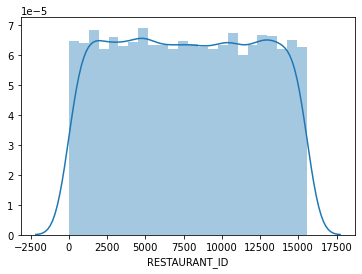

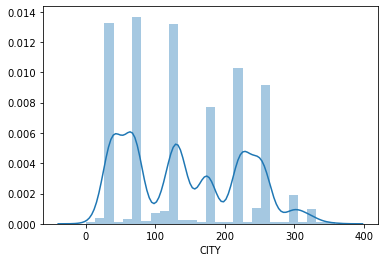

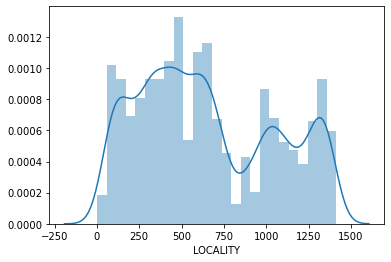

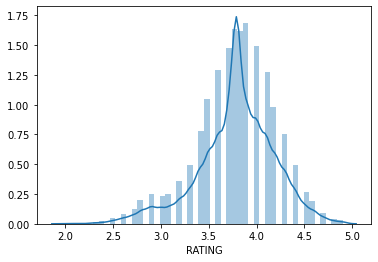

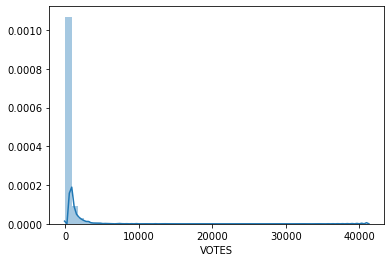

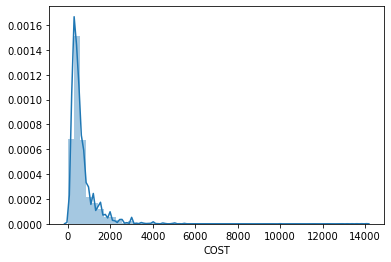

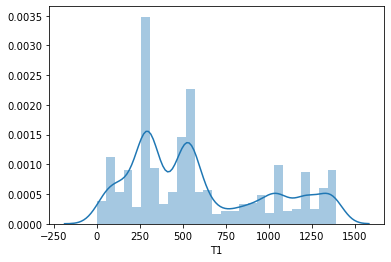

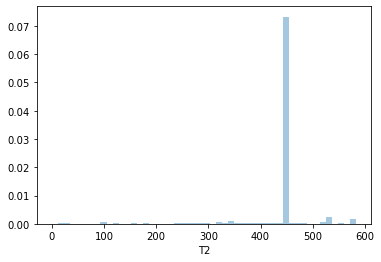

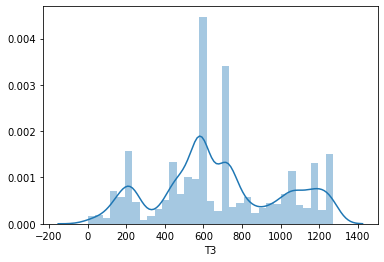

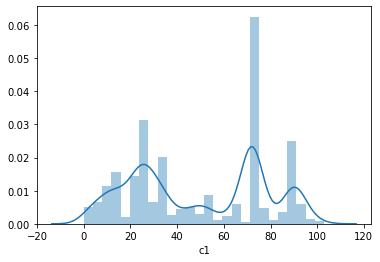

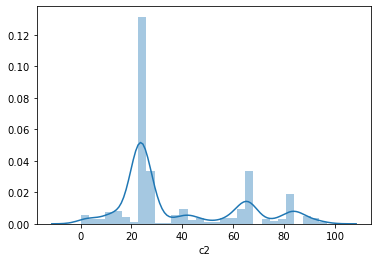

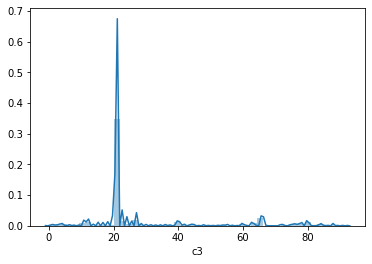

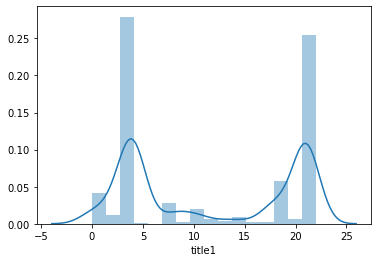

In [26]:
#Oldpeak and slope-right skewed
collist=df.columns.values
ncol=10
nrow=20
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [30]:
#Power transform 
from sklearn.preprocessing import power_transform
pt=power_transform(data,method='yeo-johnson')
new=pd.DataFrame(pt,columns=data.columns)

In [32]:
new.skew()

RESTAURANT_ID   -0.288034
CITY            -0.127747
LOCALITY        -0.139755
RATING           0.022489
VOTES           -0.026795
COST             0.004071
T1              -0.072465
T2               0.495160
T3              -0.100707
c1              -0.220149
c2               0.020733
c3               0.027073
title1          -0.174378
dtype: float64

In [84]:
df_x=new.drop(columns=['COST'])
y=pd.DataFrame(new['COST'])
x=pd.DataFrame(df_x)

In [85]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [87]:
print(x_train.shape, '\t', x_test.shape)
print(y_train.shape, '\t', y_test.shape)

(8239, 12) 	 (3531, 12)
(8239, 1) 	 (3531, 1)


In [88]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
max_r_score=0
for r_state in range(30,100):
    reg=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state)
    reg.fit(x_train,y_train)
    y_pred=reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state,"is",max_r_score)

max r2 score corresponding to  42 is 0.33413452610959693


In [89]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn import linear_model
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),AdaBoostRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print(m,"score",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('mean abs error',mean_absolute_error(y_test,predm))
    print('mean square error',mean_squared_error(y_test,predm))
    print('RMSE',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2score",r2_score(y_test,predm))
    print("*********************************************")
    print("\n")

LinearRegression() score 0.28891950040777237
mean abs error 0.6560264891799099
mean square error 0.7240076204968172
RMSE 0.8508863734346773
r2score 0.29242948319625905
*********************************************


DecisionTreeRegressor() score 1.0
mean abs error 0.6484939795558486
mean square error 0.7202463725858003
RMSE 0.848673301445144
r2score 0.2961053397105855
*********************************************


KNeighborsRegressor() score 0.5831050069180195
mean abs error 0.610345969982195
mean square error 0.6314994745449455
RMSE 0.7946694121110649
r2score 0.38283742198950754
*********************************************


SVR() score 0.5231236549241701
mean abs error 0.5751021585722226
mean square error 0.570446517507063
RMSE 0.7552790990799778
r2score 0.44250429722770956
*********************************************


Lasso() score 0.0
mean abs error 0.8190519016681963
mean square error 1.0255810240506011
RMSE 1.0127097432387038
r2score -0.0022973165857498312
*******************

#Observation:
LinearRegression-29
DecisionTreeRegressor-29
KNeighborsRegressor-79
SVR-44
Lasso-0
Ridge-29
ElasticNet-0
AdaBoostRegressor-37
RandomForestRegressor-65
GradientBoostingRegressor-62

Best method KNN

In [90]:
#Crossvalidation
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),AdaBoostRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    rfcscores=cross_val_score(m,x,y,cv=5,scoring='r2')
    print(m)
    print('score',rfcscores)
    print('mean score',rfcscores.mean(),'std',rfcscores.std())
    print('*****************************')

LinearRegression()
score [0.27523281 0.30090356 0.29352228 0.2756335  0.29645405]
mean score 0.2883492394892341 std 0.010805459709128001
*****************************
DecisionTreeRegressor()
score [0.27798963 0.25015893 0.34688841 0.26292631 0.33447647]
mean score 0.29448794833884884 std 0.038931438692572914
*****************************
KNeighborsRegressor()
score [0.35972712 0.37929172 0.41447602 0.34499917 0.38143794]
mean score 0.37598639244621423 std 0.02343786622457495
*****************************
SVR()
score [0.42339365 0.42898133 0.45773012 0.42446282 0.45460963]
mean score 0.43783550950549177 std 0.015119254697245968
*****************************
Lasso()
score [-9.86910955e-06 -3.75095265e-03 -2.37227242e-04 -7.20707314e-04
 -1.99702834e-04]
mean score -0.0009836918295220265 std 0.0014033582654329085
*****************************
Ridge()
score [0.27523502 0.30090237 0.29352203 0.27563381 0.2964535 ]
mean score 0.28834934464710926 std 0.010804469260945719
*********************

Observation:Best model Randomforest regressor

In [82]:
#Gridsearchcv for randomforest regressor
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor()
parameters={'n_estimators':[200, 400, 600, 800]}
clf=GridSearchCV(rf,parameters)
clf.fit(x,y)
print('best parameters',clf.best_params_)

best parameters {'n_estimators': 800}


In [65]:
#Best model for randomforest regressor
r=RandomForestRegressor(n_estimators=800,min_samples_leaf=1)
r.fit(x_train,y_train)
predr=r.predict(x_test)
print(r.score(x_train,y_train))
print('mean abs error',mean_absolute_error(y_test,predr))
print('mean square error',mean_squared_error(y_test,predr))
print('RMSE',np.sqrt(mean_squared_error(y_test,predr)))
print("r2score",r2_score(y_test,predr))

0.9574197970148559
mean abs error 177.31277293967713
mean square error 69768.12030589422
RMSE 264.1365561710348
r2score 0.660319590563925


# Test data

In [67]:
df1=pd.read_csv('test123.csv')
df1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [68]:
df1['T1']=df1["TIME"].str.split(",").str[0]
df1['T2']=df1["TIME"].str.split(r"(").str[-1].str[0:-1]
df1['T3']=df1["TIME"].str.split(",",1).str[-1].str.split("(").str[0]

c1=df1['CUISINES'].str.split(",").str[0]
df1['c1'] = c1
c2=df1['CUISINES'].str.split(",").str[1]
df1['c2'] = c2
c3=df1['CUISINES'].str.split(",").str[2]
df1['c3'] = c3

title1=df1['TITLE'].str.split(",").str[0]
df1['title1'] = title1
title2=df1['TITLE'].str.split(",").str[1]
df1['title2'] = title2

df1=df1.drop(["TITLE","CUISINES","TIME"],axis=1)

df1['RATING']=pd.to_numeric(df1['RATING'].str.replace("-",""))
df1['VOTES']=pd.to_numeric(df1['VOTES'].str.replace("votes",""))

df1

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,T1,T2,T3,c1,c2,c3,title1,title2
0,4085,Noida,Sector 18,4.3,564.0,12noon – 12midnight (Mon-Sun),Mon-Sun,12noon – 12midnight,North Indian,Chinese,Mughlai,CASUAL DINING,NaN
1,12680,Mumbai,Grant Road,4.2,61.0,7am – 12:30AM (Mon-Sun),Mon-Sun,7am – 12:30AM,South Indian,Fast Food,Pizza,QUICK BITES,NaN
2,1411,Mumbai,Marine Lines,3.8,350.0,11am – 11:30pm (Mon-Sun),Mon-Sun,11am – 11:30pm,North Indian,Seafood,Biryani,CASUAL DINING,NaN
3,204,Faridabad,NIT,3.8,1445.0,9am – 10pm (Mon,"Mon, Wed, Thu, Fri, Sat, Sun), 10:39am..","Wed, Thu, Fri, Sat, Sun), 10:39am...",Biryani,NaN,NaN,None,NaN
4,13453,Kochi,Kaloor,3.6,23.0,11am – 10pm (Mon-Sun),Mon-Sun,11am – 10pm,South Indian,Kerala,NaN,QUICK BITES,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,9057,New Delhi,Punjabi Bagh,3.9,287.0,11:30am – 11:30pm (Mon-Sun),Mon-Sun,11:30am – 11:30pm,North Indian,Mughlai,Chinese,CASUAL DINING,NaN
4227,1247,Bangalore,HSR Layout,4.3,469.0,11am – 1am (Mon-Sun),Mon-Sun,11am – 1am,Biryani,North Indian,Sandwich,None,NaN
4228,8617,Faridabad,Sector 86,3.7,53.0,9:30am – 10:30pm (Mon-Sun),Mon-Sun,9:30am – 10:30pm,Continental,North Indian,NaN,QUICK BITES,NaN
4229,6485,Kochi,Kochi,NaN,NaN,11am – 11:30pm (Mon,"Mon, Tue, Wed, Thu, Sat, Sun), 3pm..","Tue, Wed, Thu, Sat, Sun), 3pm...",Rolls,Beverages,NaN,QUICK BITES,NaN


In [71]:
from sklearn.impute import SimpleImputer
imp1=SimpleImputer(strategy="most_frequent")
df1['CITY']=imp1.fit_transform(df1['CITY'].values.reshape(-1,1))
df1['c2']=imp1.fit_transform(df1['c2'].values.reshape(-1,1))
df1['c3']=imp1.fit_transform(df1['c3'].values.reshape(-1,1))
df1['LOCALITY']=imp1.fit_transform(df1['LOCALITY'].values.reshape(-1,1))


from sklearn.impute import SimpleImputer
imp1=SimpleImputer(strategy="mean")
df1['VOTES']=imp1.fit_transform(df1['VOTES'].values.reshape(-1,1))
df1['RATING']=imp1.fit_transform(df1['RATING'].values.reshape(-1,1))

In [76]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
list1=["CITY","LOCALITY","T1","T2","T3","c1","c2","c3","title1"]
for val in list1:
    df1[val]=le.fit_transform(df1[val].astype(str))
df1

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,T1,T2,T3,c1,c2,c3,title1
0,4085,110,662,4.300000,564.000000,299,181,390,60,19,56,5
1,12680,96,221,4.200000,61.000000,592,181,588,73,24,61,22
2,1411,96,411,3.800000,350.000000,147,181,300,60,69,13,5
3,204,41,456,3.800000,1445.000000,719,137,203,12,19,19,19
4,13453,78,300,3.600000,23.000000,140,181,299,73,42,19,22
...,...,...,...,...,...,...,...,...,...,...,...,...
4226,9057,108,597,3.900000,287.000000,86,181,264,60,57,19,5
4227,1247,9,237,4.300000,469.000000,172,181,315,12,59,65,19
4228,8617,41,696,3.700000,53.000000,700,181,667,22,59,19,22
4229,6485,78,332,3.781536,429.769391,144,112,180,67,10,19,22


In [77]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
threshold=3
print(np.where(z>3))
data1=df1[(z<3).all(axis=1)]
data1

(array([  13,   16,   27,   31,   34,   40,   78,   83,   86,   90,   92,
         96,   98,  121,  127,  164,  188,  198,  230,  276,  282,  287,
        377,  400,  407,  414,  451,  479,  484,  502,  534,  549,  604,
        647,  660,  662,  667,  669,  679,  716,  730,  759,  763,  804,
        875,  880,  888,  932,  945,  985,  987, 1008, 1026, 1068, 1093,
       1098, 1111, 1130, 1134, 1147, 1156, 1173, 1209, 1287, 1293, 1301,
       1308, 1314, 1324, 1356, 1378, 1407, 1411, 1432, 1436, 1459, 1467,
       1476, 1506, 1508, 1509, 1511, 1549, 1550, 1553, 1620, 1643, 1649,
       1659, 1692, 1719, 1738, 1751, 1785, 1789, 1796, 1816, 1824, 1845,
       1864, 1870, 1874, 1907, 1908, 1919, 1927, 1942, 1973, 1998, 2004,
       2009, 2019, 2093, 2107, 2116, 2121, 2130, 2140, 2159, 2178, 2194,
       2214, 2215, 2225, 2254, 2277, 2278, 2282, 2304, 2315, 2326, 2326,
       2355, 2357, 2363, 2394, 2408, 2415, 2486, 2490, 2500, 2508, 2541,
       2545, 2589, 2594, 2613, 2639, 2641, 2650, 2

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,T1,T2,T3,c1,c2,c3,title1
0,4085,110,662,4.300000,564.000000,299,181,390,60,19,56,5
1,12680,96,221,4.200000,61.000000,592,181,588,73,24,61,22
2,1411,96,411,3.800000,350.000000,147,181,300,60,69,13,5
3,204,41,456,3.800000,1445.000000,719,137,203,12,19,19,19
4,13453,78,300,3.600000,23.000000,140,181,299,73,42,19,22
...,...,...,...,...,...,...,...,...,...,...,...,...
4226,9057,108,597,3.900000,287.000000,86,181,264,60,57,19,5
4227,1247,9,237,4.300000,469.000000,172,181,315,12,59,65,19
4228,8617,41,696,3.700000,53.000000,700,181,667,22,59,19,22
4229,6485,78,332,3.781536,429.769391,144,112,180,67,10,19,22


In [78]:
print(df1.shape) #dataset
print(data1.shape) #Removed Outliers

(4231, 12)
(3993, 12)


In [79]:
#predicting 
r.predict(data1)

array([500.1875, 500.1875, 500.1875, ..., 500.1875, 500.1875, 500.1875])

In [80]:
df=pd.DataFrame(predr)
df.to_csv('Finalrespred.csv')